#Project 9 - Dimensionality reduction - Wilfredo Aaron Sosa Ramos

#Data Engineering Lifecycle

#Phase 1: Ingestion

In [1]:
#Mount the google drive connection to our dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/AI/Project 9/dataset/abalone.csv')

In [3]:
df.head()

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           4177 non-null   object 
 1   LongestShell   4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   WholeWeight    4177 non-null   float64
 5   ShuckedWeight  4177 non-null   float64
 6   VisceraWeight  4177 non-null   float64
 7   ShellWeight    4177 non-null   float64
 8   Rings          4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
df.describe()

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [6]:
df.shape

(4177, 9)

In [7]:
df.isnull().sum()

Type             0
LongestShell     0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64

In [8]:
df.isna().sum()

Type             0
LongestShell     0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64

In [9]:
df["Type"].unique()

array(['M', 'F', 'I'], dtype=object)

# Phase 2: Transformation

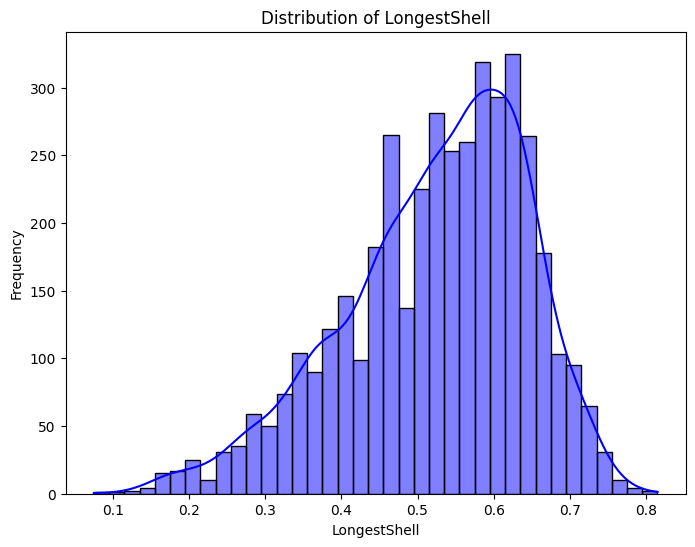

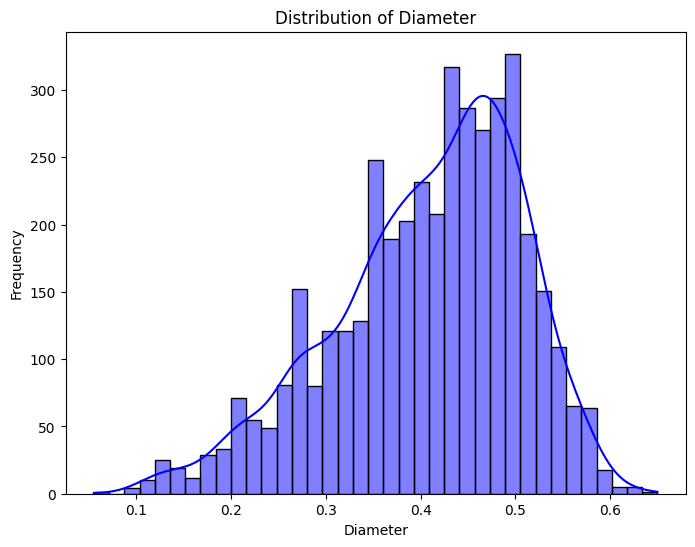

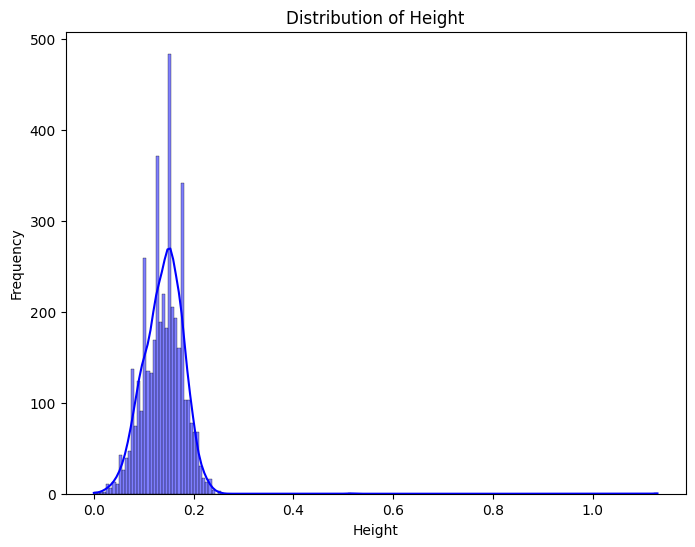

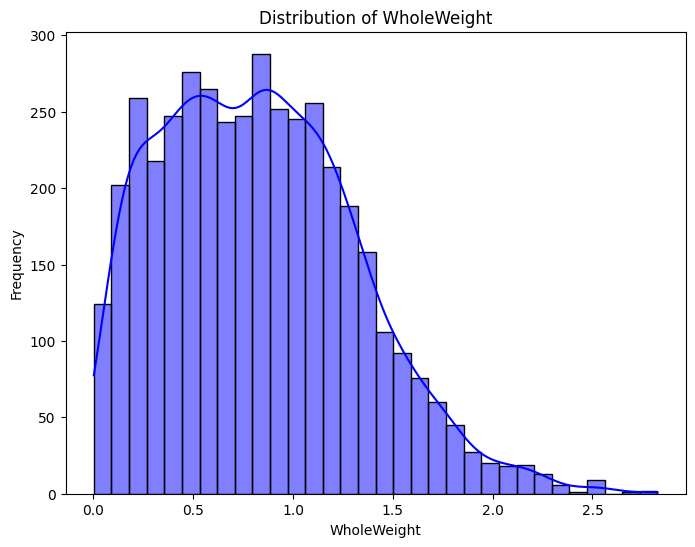

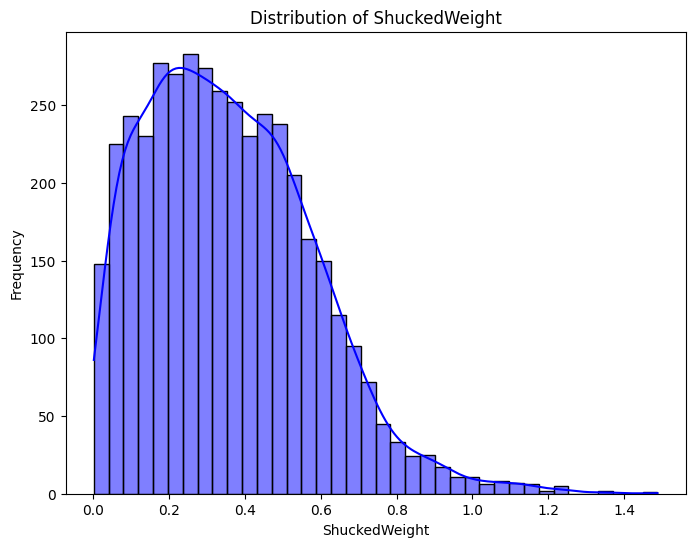

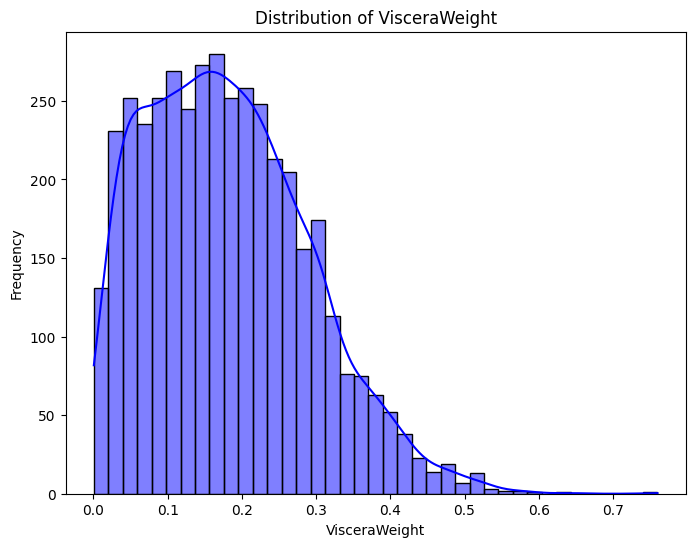

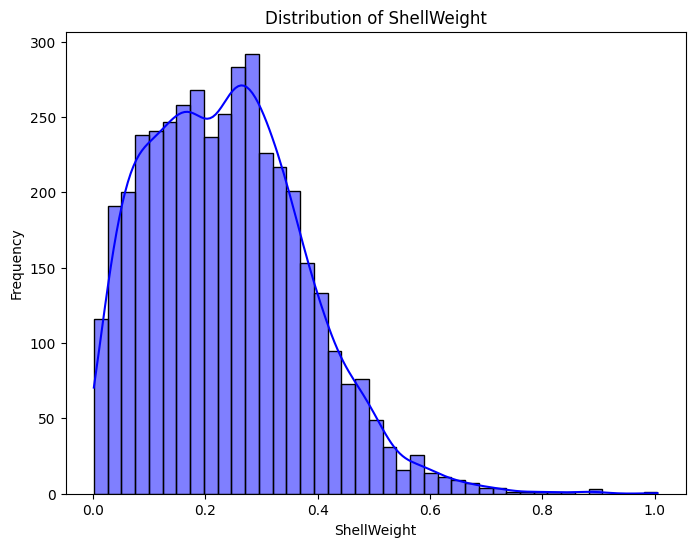

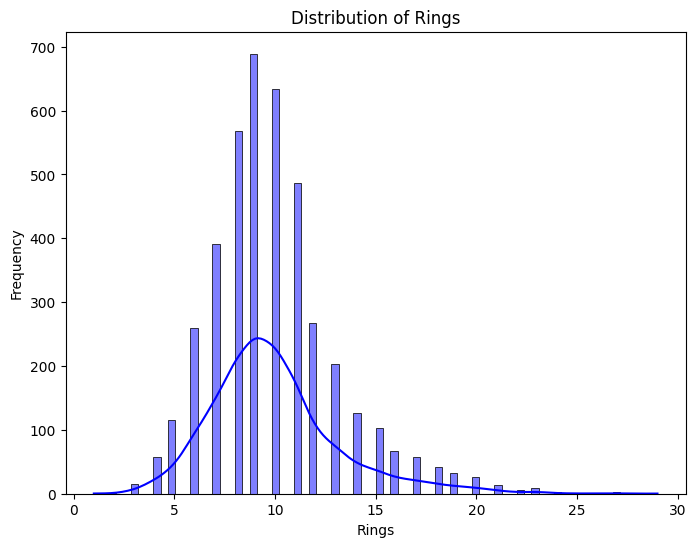

<ipython-input-10-eae17d6a7f85>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


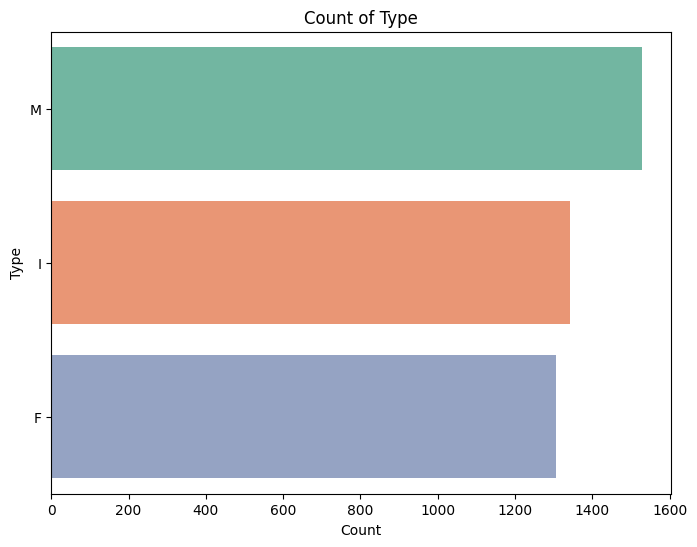

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_charts(df):
  # Numeric features
  numeric_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
  for feature in numeric_features:
      plt.figure(figsize=(8, 6))
      sns.histplot(df[feature], kde=True, color='blue')
      plt.title(f'Distribution of {feature}')
      plt.xlabel(feature)
      plt.ylabel('Frequency')
      plt.show()

  # Categorical features
  categorical_features = [col for col in df.columns if df[col].dtype == 'object']
  for feature in categorical_features:
      plt.figure(figsize=(8, 6))
      sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')
      plt.title(f'Count of {feature}')
      plt.xlabel('Count')
      plt.ylabel(feature)
      plt.show()

plot_charts(df)

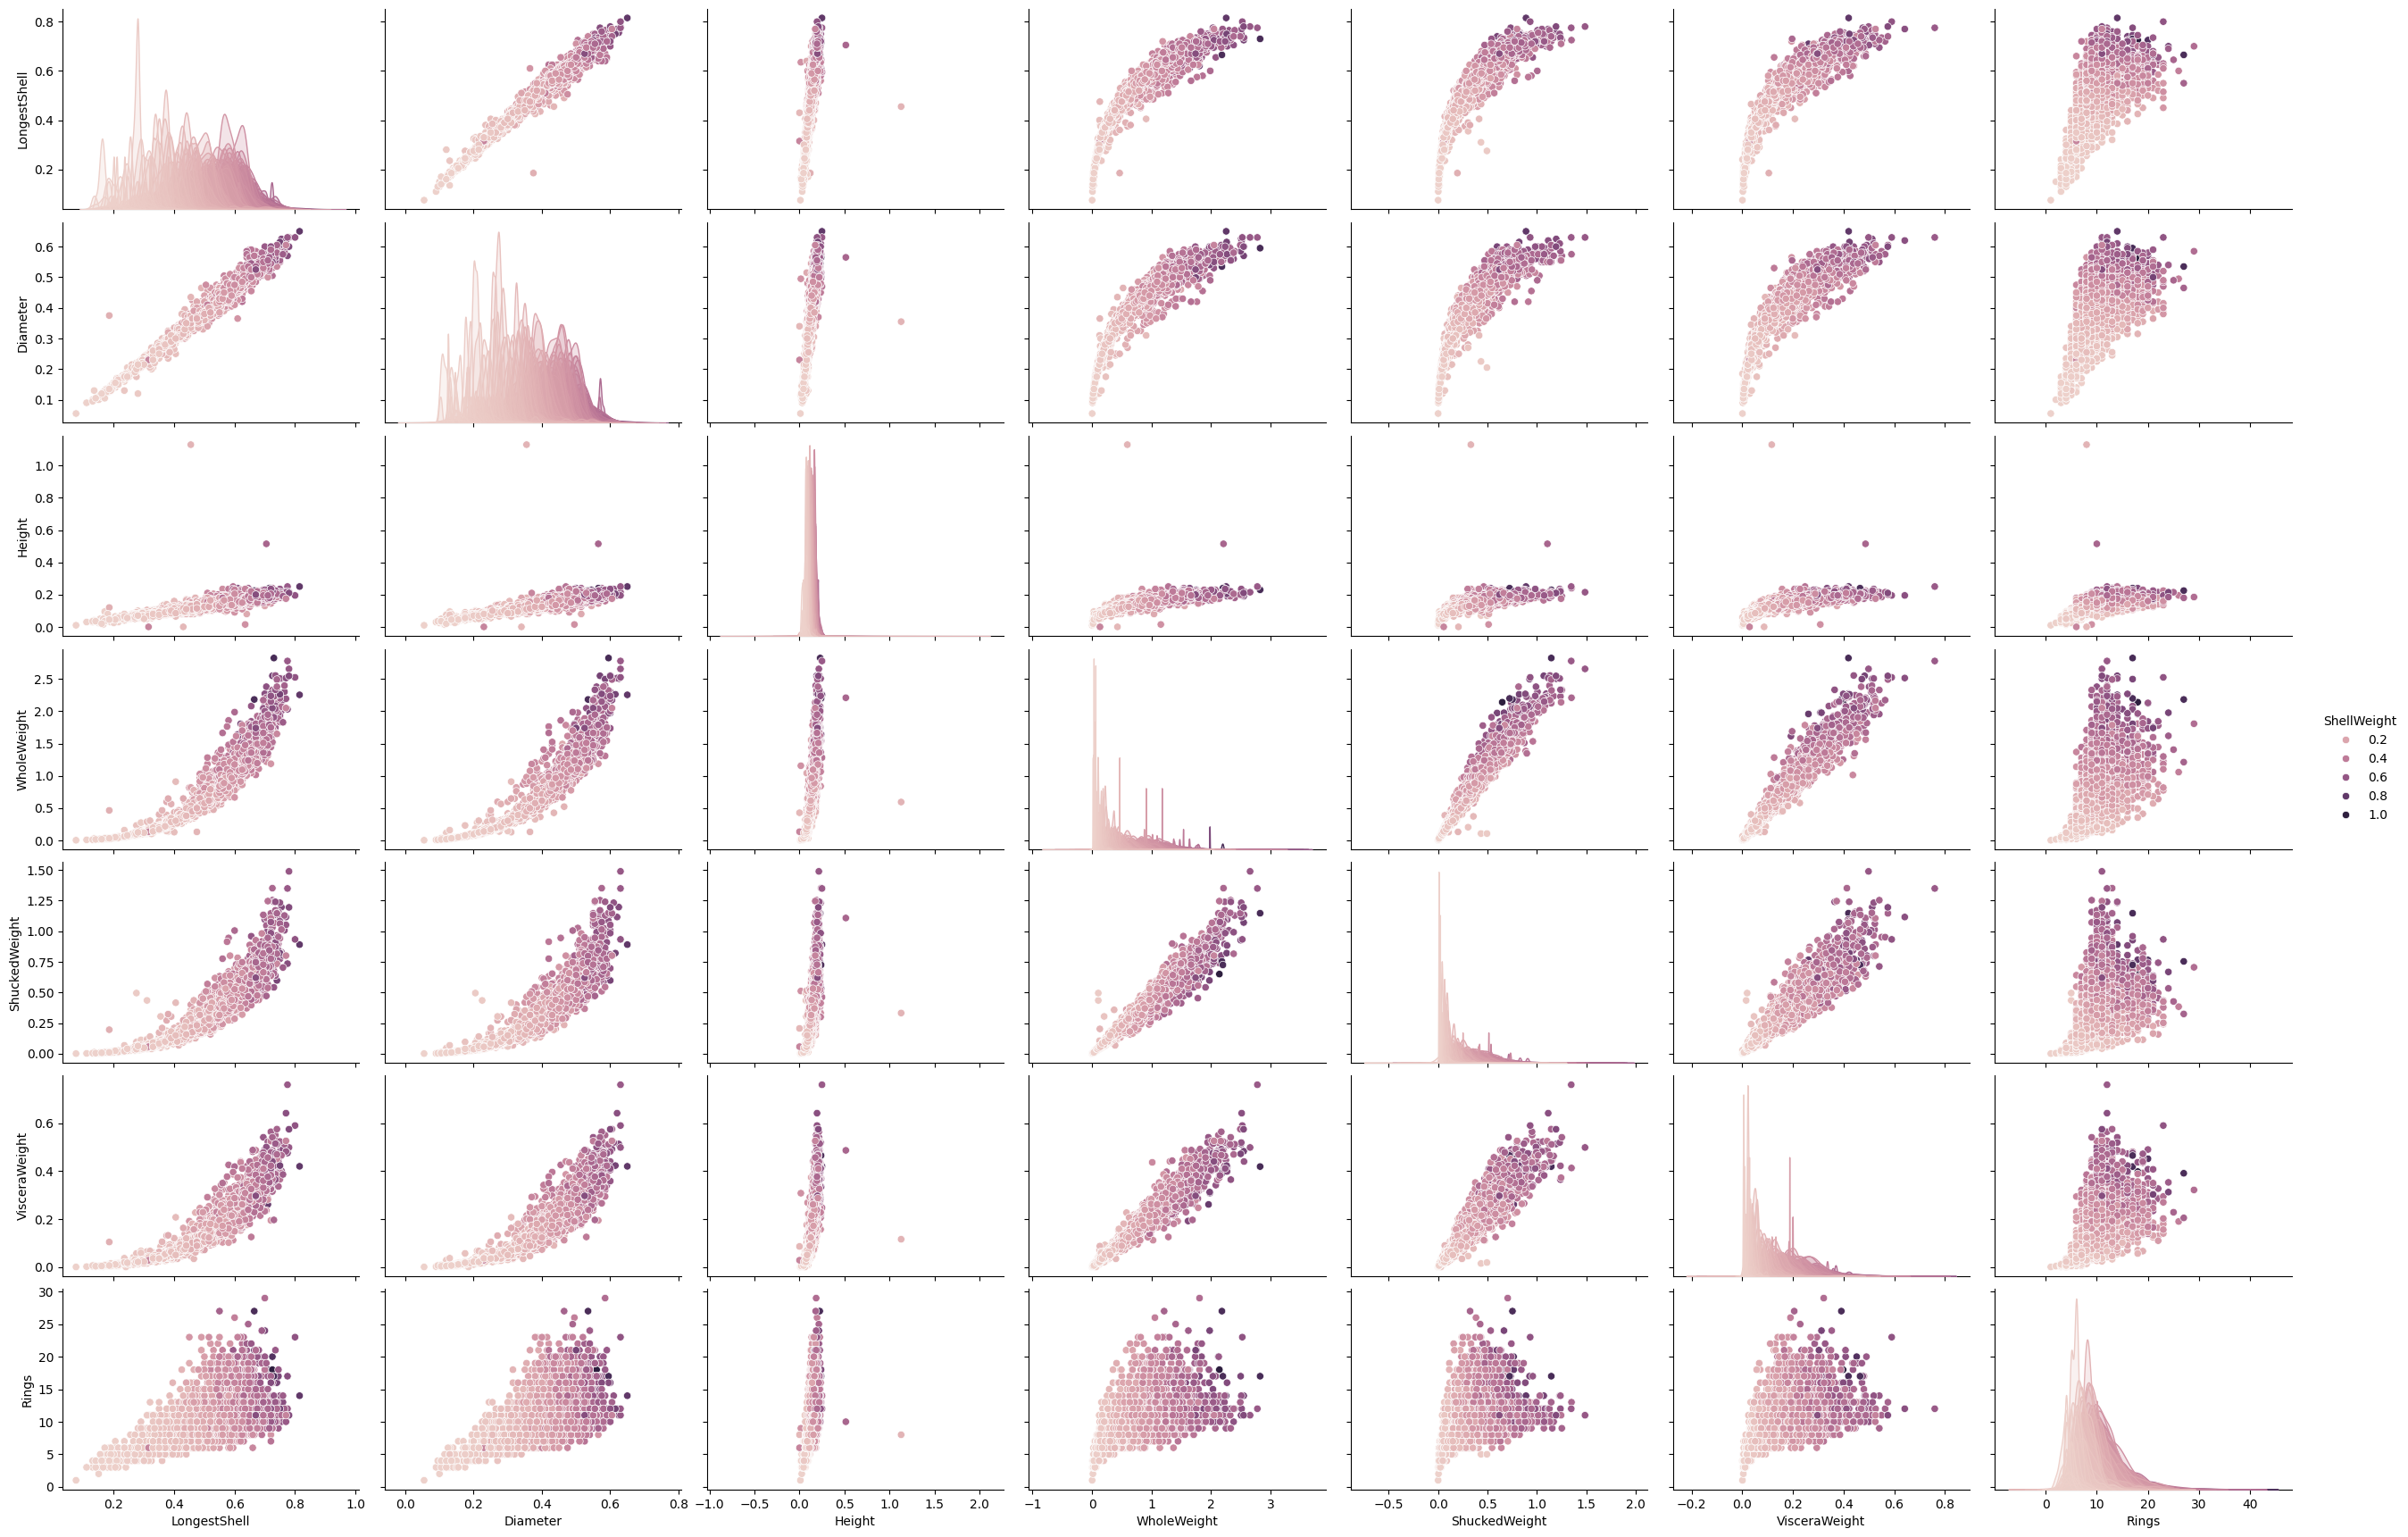

In [11]:
sns.pairplot(df, hue='ShellWeight', aspect=1.5)
plt.show()

In [12]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = df.select_dtypes(include=['object']).columns.tolist()

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

In [14]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

In [15]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', cat_transformer, cat_features)
    ])

In [17]:
df_encoded = preprocessor.fit_transform(df)

In [18]:
new_column_names = preprocessor.named_transformers_['cat'] \
    .named_steps['encoder'].get_feature_names_out(input_features=cat_features)

In [19]:
new_column_names

array(['Type_F', 'Type_I', 'Type_M'], dtype=object)

In [20]:
columns = df.columns.tolist()

In [21]:
columns

['Type',
 'LongestShell',
 'Diameter',
 'Height',
 'WholeWeight',
 'ShuckedWeight',
 'VisceraWeight',
 'ShellWeight',
 'Rings']

In [22]:
columns.remove("Type")

In [23]:
columns

['LongestShell',
 'Diameter',
 'Height',
 'WholeWeight',
 'ShuckedWeight',
 'VisceraWeight',
 'ShellWeight',
 'Rings']

In [24]:
columns.extend(new_column_names.tolist())

In [25]:
columns

['LongestShell',
 'Diameter',
 'Height',
 'WholeWeight',
 'ShuckedWeight',
 'VisceraWeight',
 'ShellWeight',
 'Rings',
 'Type_F',
 'Type_I',
 'Type_M']

In [26]:
df_encoded = pd.DataFrame(df_encoded, columns=columns)

In [27]:
df_encoded.head()

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Type_F,Type_I,Type_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0,0.0,0.0,1.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0,1.0,0.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0,0.0,0.0,1.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0,0.0,1.0,0.0


In [28]:
X = df_encoded.drop("Type_F", axis=1)
y = df_encoded["Type_F"]

In [29]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Phase 3: Serving

# Principal Component Analysis (PCA)

Source: https://www.kaggle.com/code/pranaysingh25/dimensionality-reduction-visualization-mnist

In [30]:
X_train_ = X_train.copy()

Compress data

In [31]:
import time
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
start = time.time()
X_reduced = pca.fit_transform(X_train)
end = time.time()

end - start

0.026496410369873047

Number of important features (Only 2 features preserve the 95% of the data)

In [32]:
pca.n_components_

2

Decompress the data (5% of data is loss)

In [33]:
X_decompress = pca.inverse_transform(X_reduced)

In [34]:
X_reduced.size

5012

In [35]:
X_reduced.shape

(2506, 2)

In [36]:
X_decompress.size

25060

In [37]:
X_decompress.shape

(2506, 10)

Let's test it with RandomForestClassifier on Original Data

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state = 42)
t0 = time.time()
rfc.fit(X_train_, y_train)
t1 = time.time()

t1-t0

0.4469139575958252

Original data

In [39]:
rfc.score(X_test, y_test)

1.0

Let's test it with RandomForestClassifier on Reduced Data

In [40]:
rfc2 = RandomForestClassifier(n_estimators = 100, random_state = 42)
t0 = time.time()
rfc2.fit(X_reduced, y_train)
t1 = time.time()

t1-t0

0.5347940921783447

In [41]:
X_test_reduced = pca.transform(X_test)
rfc2.score(X_test_reduced, y_test)

0.9760765550239234

Let's test it with SoftmaxClassifier on Original Data

In [42]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', random_state = 42)
t0 = time.time()
log_clf.fit(X_train_, y_train)
t1 = time.time()

t1-t0

0.06598901748657227

In [43]:
log_clf.score(X_test, y_test)

1.0

Let's test it with SoftmaxClassifier on Reduced Data

In [44]:
log_clf2 = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', random_state = 42)
t0 = time.time()
log_clf2.fit(X_reduced, y_train)
t1 = time.time()

t1-t0

0.018125534057617188

In [45]:
log_clf2.score(X_test_reduced, y_test)

0.6626794258373205

# Kernel PCA

Source: https://www.kaggle.com/code/goktugkoc/kernel-pca

In [46]:
X_train2 = X_train_.copy()

In [47]:
import time
from sklearn.decomposition import KernelPCA
kernel_pca = KernelPCA(kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1, n_components=None)

start = time.time()
X_kpca_reduced = kernel_pca.fit_transform(X_train2)
end = time.time()
execution_time = end - start
execution_time

7.718353748321533

In [48]:
X_kpca_reduced.shape

(2506, 2505)

In [49]:
score_kernel_pca = kernel_pca.transform(X_test)

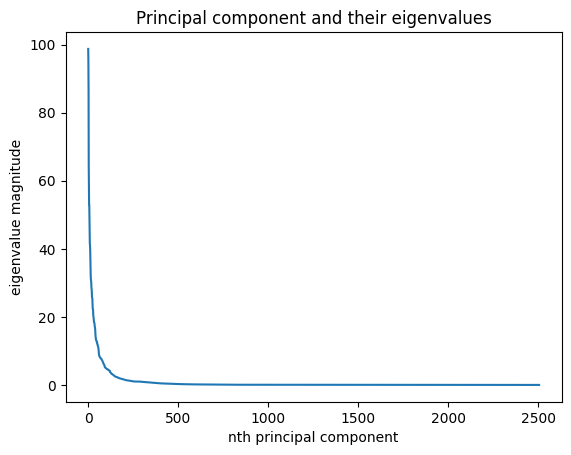

In [50]:
plt.plot(kernel_pca.eigenvalues_)

plt.title("Principal component and their eigenvalues")
plt.xlabel("nth principal component")
plt.ylabel("eigenvalue magnitude")
plt.show()

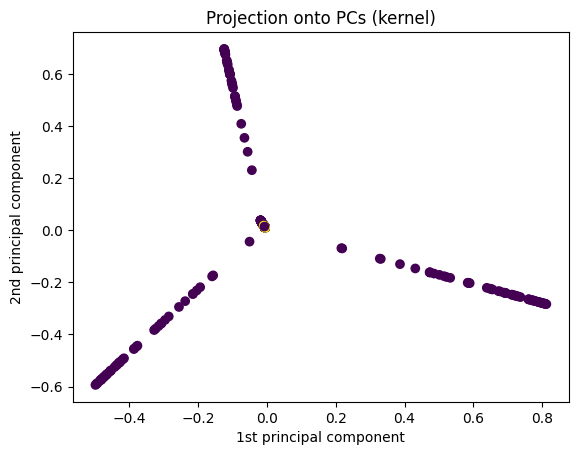

In [51]:
plt.scatter(score_kernel_pca[:,0],score_kernel_pca[:,1] ,c=y_test,cmap='viridis')
plt.title("Projection onto PCs (kernel)")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.show()

Let's test it with RandomForestClassifier on Reduced Data

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state = 42)
t0 = time.time()
rfc.fit(X_kpca_reduced, y_train)
t1 = time.time()

t1-t0

14.349153757095337

In [53]:
X_test_reduced = kernel_pca.transform(X_test)
rfc.score(X_test_reduced, y_test)

0.9784688995215312

Let's test it with SoftmaxClassifier on Reduced Data

In [54]:
log_clf2 = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', random_state = 42)
t0 = time.time()
log_clf2.fit(X_kpca_reduced, y_train)
t1 = time.time()

t1-t0

1.0619251728057861

In [55]:
log_clf2.score(X_test_reduced, y_test)

0.9880382775119617